**Objective**

Use the Glass dataset and apply the Random forest model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

**1. Exploratory Data Analysis (EDA):**

* Perform exploratory data analysis to understand the structure of the dataset.
* Check for missing values, outliers, inconsistencies in the data.

In [2]:
# Load excel file and get sheet names
excel_file = pd.ExcelFile('/content/glass.xlsx')
sheet_names = excel_file.sheet_names
print(sheet_names)

['Description', 'glass']


In [3]:
# Load sheet name 'glass'
glass_data = excel_file.parse('glass')
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
glass_data.shape

(214, 10)

In [7]:
glass_data.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


All the columns are of numeric dtype and no missing or Nan values

In [8]:
# Check for duplicates
glass_data[glass_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
# Identify and verify duplicates
glass_data[(glass_data['RI'] == 1.52213) & (glass_data['Na'] == 14.21) & (glass_data['Mg'] == 3.82)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [10]:
# Drop duplicates
glass_data.drop_duplicates(inplace=True)
glass_data.reset_index(drop=True, inplace=True)
glass_data.shape

(213, 10)

In [11]:
# Verify duplicate data
glass_data[glass_data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


**2: Data Visualization:**

* Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
* Analyze any patterns or correlations observed in the data.

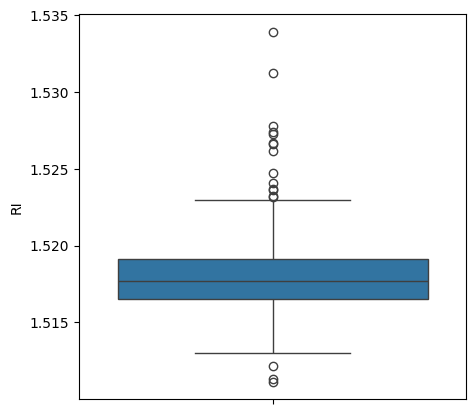

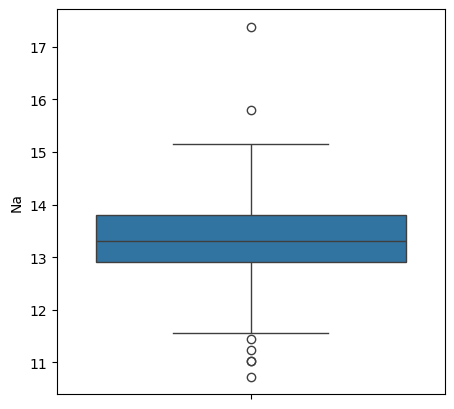

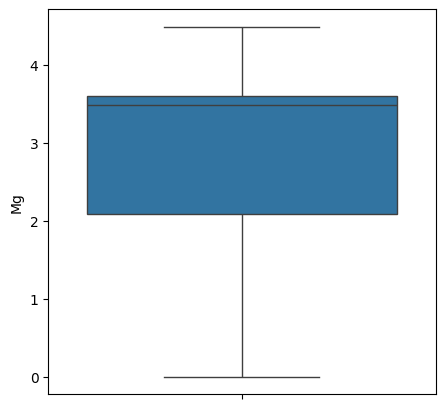

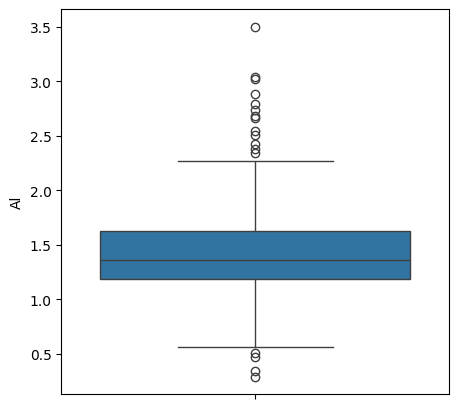

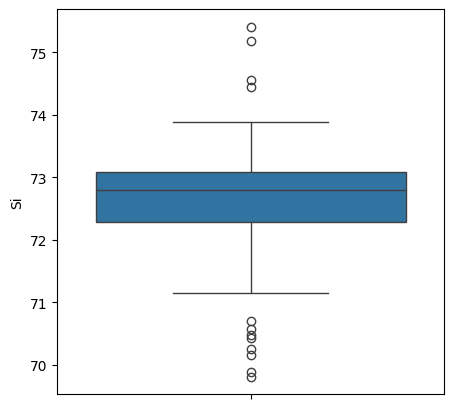

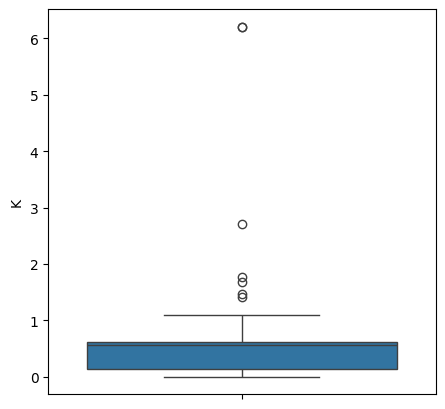

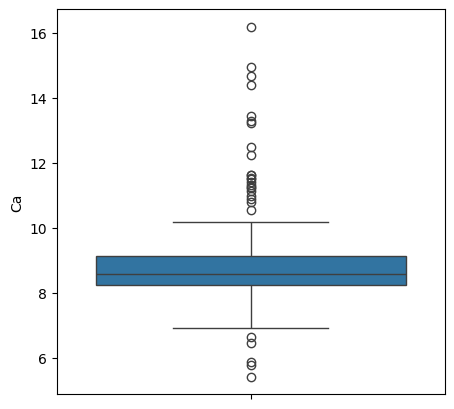

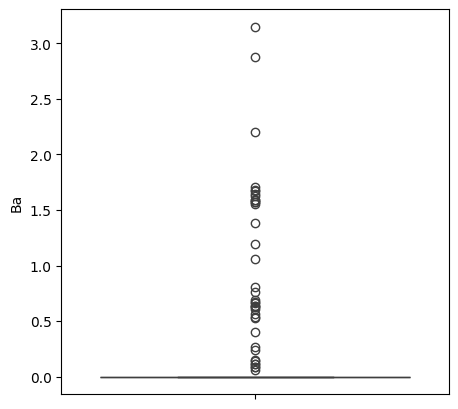

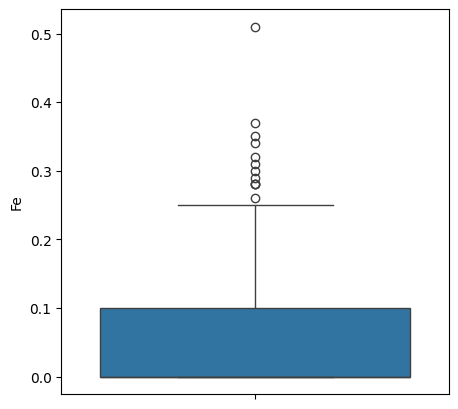

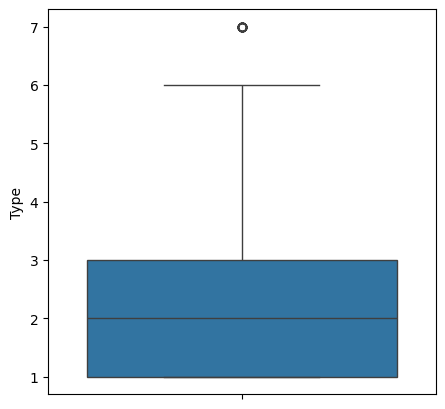

In [12]:
# Boxplot
for c in glass_data.columns:
  plt.figure(figsize=(5, 5))
  sea.boxplot(glass_data[c])
  plt.show()

<Figure size 500x500 with 0 Axes>

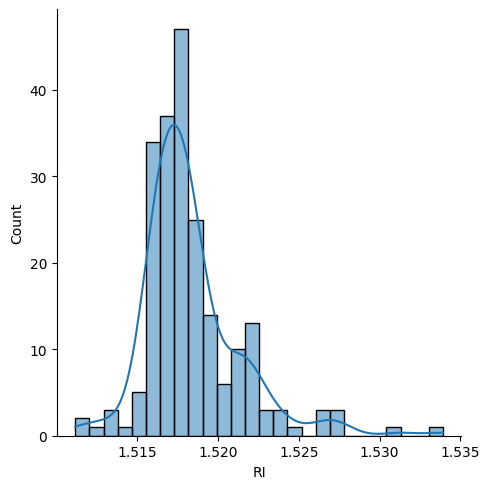

<Figure size 500x500 with 0 Axes>

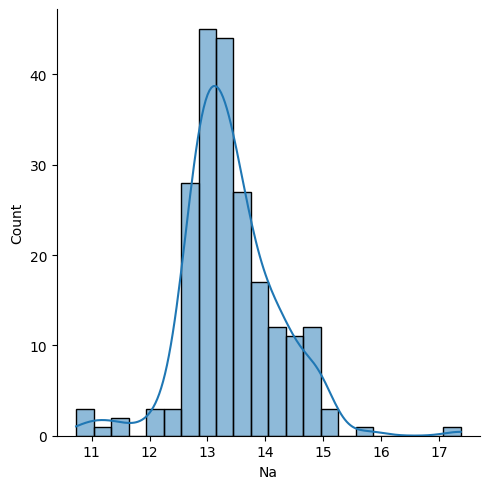

<Figure size 500x500 with 0 Axes>

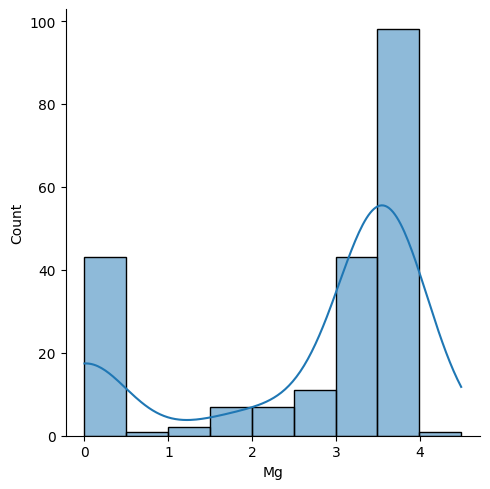

<Figure size 500x500 with 0 Axes>

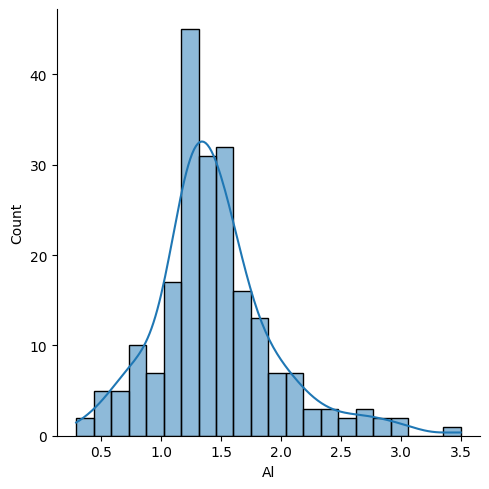

<Figure size 500x500 with 0 Axes>

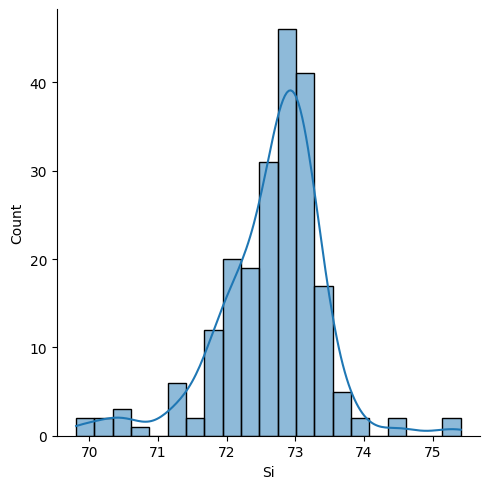

<Figure size 500x500 with 0 Axes>

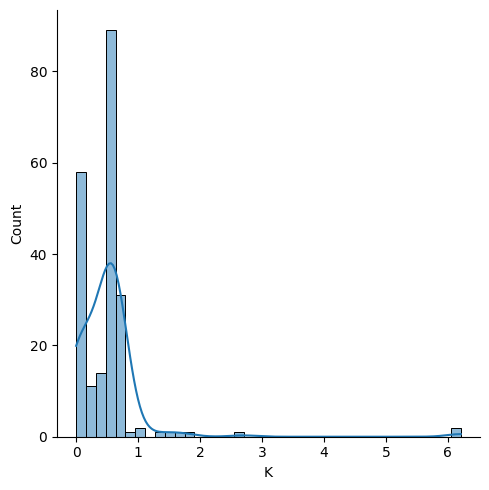

<Figure size 500x500 with 0 Axes>

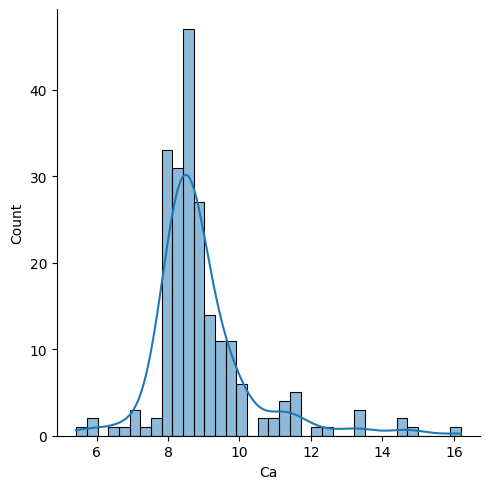

<Figure size 500x500 with 0 Axes>

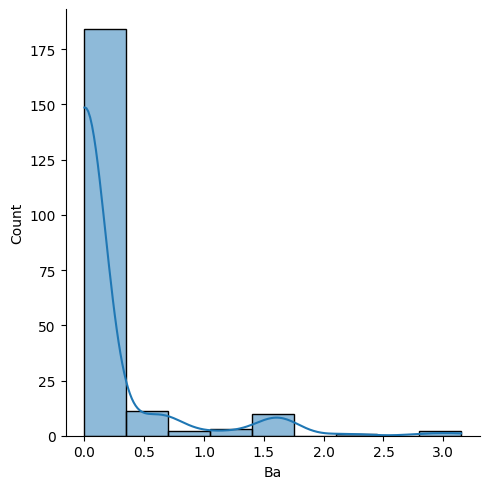

<Figure size 500x500 with 0 Axes>

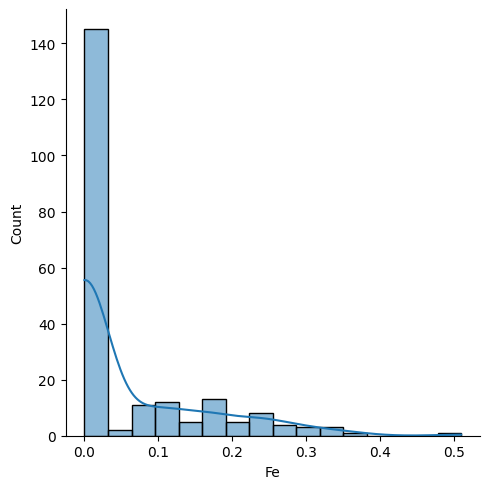

<Figure size 500x500 with 0 Axes>

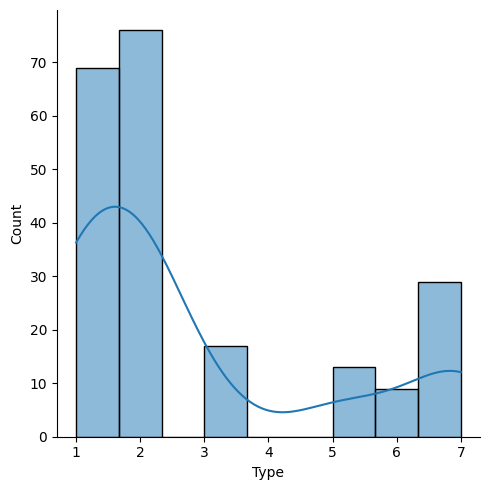

In [13]:
for c in glass_data.columns:
  plt.figure(figsize=(5, 5))
  sea.displot(glass_data[c], kde = True)
  plt.show()

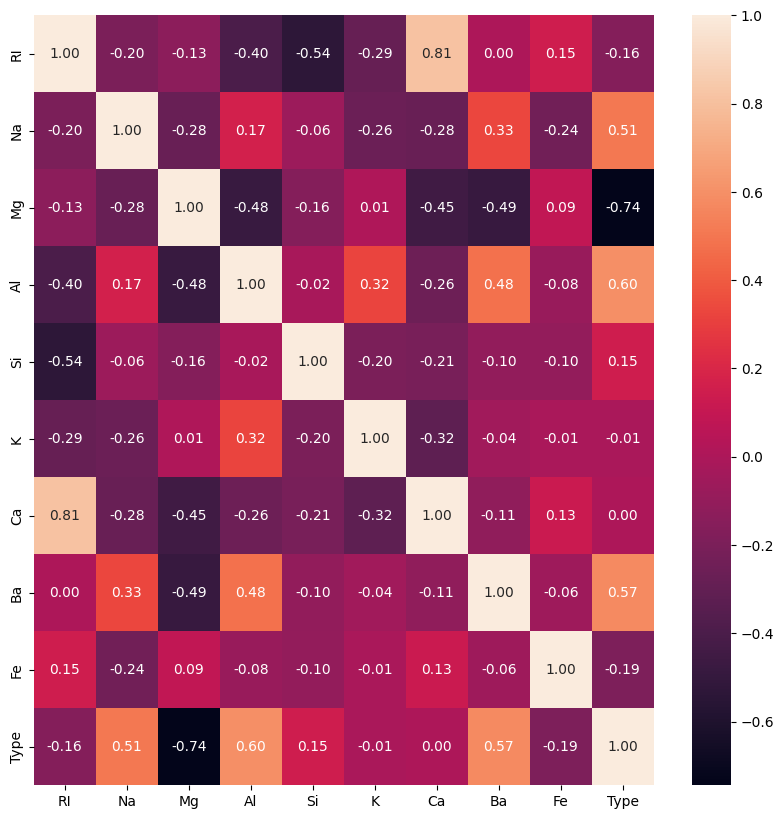

In [14]:
# Correlation
plt.figure(figsize=(10, 10))
sea.heatmap(glass_data.corr(), annot=True, fmt = '.2f')
plt.show()

**3: Data Preprocessing**

* Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
* If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
* Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

**4: Random Forest Model Implementation**

* Divide the data into train and test split.
* Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
* Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [15]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [16]:
x_data = glass_data.drop('Type', axis=1)
y_data = glass_data['Type']

In [17]:
x_train, x_test, y_train, y_test = tts(x_data, y_data, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(170, 9)
(170,)
(43, 9)
(43,)


In [18]:
# Apply standard scalar technique to all data except 'Type'
# note: the distribution of data is not gaussian so using mean and SD to scale the data would be more suitable
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(170, 9)
(43, 9)


In [19]:
parmeters_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}

In [20]:
grid_search = GridSearchCV(RandomForestClassifier(), parmeters_grid, cv = 5)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [21]:
print('Best parameters as per Grid search are', grid_search.best_params_)

Best parameters as per Grid search are {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


In [22]:
model01 = RandomForestClassifier(n_estimators = 100, max_depth = 15, min_samples_split = 2, random_state = 42)
model01.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

In [23]:
y_pred_01 = model01.predict(x_test_scaled)

print('Accuracy :', round(accuracy_score(y_test, y_pred_01), 4))
print('Precision :', round(precision_score(y_test, y_pred_01, average = 'macro'), 4))
print('Recall :', round(recall_score(y_test, y_pred_01, average = 'macro'), 4))
print('F1 score :', round(f1_score(y_test, y_pred_01, average = 'macro'), 4))

Accuracy : 0.7674
Precision : 0.8135
Recall : 0.7037
F1 score : 0.7402


In [24]:
model02 = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_split = 5, random_state = 42)
model02.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [25]:
y_pred_02 = model02.predict(x_test_scaled)

print('Accuracy :', round(accuracy_score(y_test, y_pred_02), 4))
print('Precision :', round(precision_score(y_test, y_pred_02, average = 'macro'), 4))
print('Recall :', round(recall_score(y_test, y_pred_02, average = 'macro'), 4))
print('F1 score :', round(f1_score(y_test, y_pred_02, average = 'macro'), 4))

Accuracy : 0.7907
Precision : 0.8631
Recall : 0.7537
F1 score : 0.7678


In [26]:
model03 = RandomForestClassifier(n_estimators = 150, max_depth = 10, min_samples_split = 10, random_state = 42)
model03.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=150,
                       random_state=42)

In [27]:
y_pred_03 = model03.predict(x_test_scaled)

print('Accuracy :', round(accuracy_score(y_test, y_pred_03), 4))
print('Precision :', round(precision_score(y_test, y_pred_03, average = 'macro'), 4))
print('Recall :', round(recall_score(y_test, y_pred_03, average = 'macro'), 4))
print('F1 score :', round(f1_score(y_test, y_pred_03, average = 'macro'), 4))

Accuracy : 0.8605
Precision : 0.8961
Recall : 0.837
F1 score : 0.8492


Here three models are trained with different parametrers and their key metrics have shown correspondingly. The approach to select a set of hyperparameters (values)is obtained by applying GridSearchCV function. Next, the values of these parameters are changed manually to evaluate the key metrics. This is a crude way of fine tuning hyperparameters to imporve the model performance. The overall accuracy of model03 is 86%, meaning it correctly classifies 86% of all samples, the probability of predicting positives is about 89% and probability of not missing the actual positives is about 84%.

**5: Bagging and Boosting Methods**

* Apply the Bagging and Boosting methods and compare the results.

These methods Bagging and Boosting are part of ensemble techniques, where the main idea is to train a bunch of models (individual decision trees) and combining their perdictions to get a better performing model.

* Random Forest is an example of Bagging method
  * Combines models by averaging multiple decision tress or random subsets of data
  * Reduces Variance and overfitting
* Adaboost, XGBoost are examples of Boosting method
  * Models are trained sequentially and each new model learns from the previous ones
  * Reduces bais and improves accuracy for structured data but can overfit if not tuned properly

In [28]:
# Boosting method
from sklearn.ensemble import AdaBoostClassifier

In [29]:
ada_model01 = AdaBoostClassifier(estimator = model01, n_estimators = 50, random_state = 42)
ada_model01.fit(x_train_scaled, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15,
                                                    random_state=42),
                   random_state=42)

In [30]:
y_pred_ada_01 = ada_model01.predict(x_test_scaled)

print('Accuracy :', round(accuracy_score(y_test, y_pred_ada_01), 4))
print('Precision :', round(precision_score(y_test, y_pred_ada_01, average = 'macro'), 4))
print('Recall :', round(recall_score(y_test, y_pred_ada_01, average = 'macro'), 4))
print('F1 score :', round(f1_score(y_test, y_pred_ada_01, average = 'macro'), 4))

Accuracy : 0.814
Precision : 0.8754
Recall : 0.8074
F1 score : 0.8225


In [31]:
ada_model02 = AdaBoostClassifier(estimator = model02, n_estimators = 50, random_state = 42)
ada_model02.fit(x_train_scaled, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                    min_samples_split=5,
                                                    random_state=42),
                   random_state=42)

In [32]:
y_pred_ada_02 = ada_model02.predict(x_test_scaled)

print('Accuracy :', round(accuracy_score(y_test, y_pred_ada_02), 4))
print('Precision :', round(precision_score(y_test, y_pred_ada_02, average = 'macro'), 4))
print('Recall :', round(recall_score(y_test, y_pred_ada_02, average = 'macro'), 4))
print('F1 score :', round(f1_score(y_test, y_pred_ada_02, average = 'macro'), 4))

Accuracy : 0.7907
Precision : 0.9034
Recall : 0.7074
F1 score : 0.7597


In [33]:
ada_model03 = AdaBoostClassifier(estimator = model03, n_estimators = 50, random_state = 42)
ada_model03.fit(x_train_scaled, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                    min_samples_split=10,
                                                    n_estimators=150,
                                                    random_state=42),
                   random_state=42)

In [34]:
y_pred_ada_03 = ada_model03.predict(x_test_scaled)

print('Accuracy :', round(accuracy_score(y_test, y_pred_ada_03), 4))
print('Precision :', round(precision_score(y_test, y_pred_ada_03, average = 'macro'), 4))
print('Recall :', round(recall_score(y_test, y_pred_ada_03, average = 'macro'), 4))
print('F1 score :', round(f1_score(y_test, y_pred_ada_03, average = 'macro'), 4))

Accuracy : 0.7674
Precision : 0.8544
Recall : 0.7352
F1 score : 0.7526


Here two ensemble methods have been applied Bagging and Boosting.

* Random forest is an example of Bagging method, where several decision trees (n_estimators) are created and models are trained in parallel and independently on different subsets of training data. The final prediction is the prediction from all models using majority voting
  * Example: models = n_estimators, and each predicting an output (class),
  * n_estimators = 5, Class = [0, 1, 0, 1, 1]. Two models outputs 0 and three  models 1. The majority of the models voted for class 1. Therefore, the final output or prediction is 1

* Ada Boosting is an example of Boosting ensemble method, similar to the Boosting method, several decision tree classifiers are created. Each model trains or 'learns' starting from a 'weak' base model in a serial manner with the focus on misclassified samples. The final prediction is a weighted output of all the models, where the models with higher performance is associated with more weight.



Upon comparing models from both ensemble methods, we can see that

* In the case of Model01, the Boosting model performs better than the Bagging model, as expected. The sequential learning process allows the model to focus on and correct previous misclassifications, leading to improved overall performance.

* In the Model02 case, the precision score is higher in the Boosting model
The reason for these improved performances is that the model 'learns' from the misclassification and hence achieves better performance.

* Interestingly, for Model03, the fine-tuned Bagging model outperforms the Boosting approach. This counter-intuitive result occurs because the Bagging model was already manually optimized to near-peak performance. When used as a base for Boosting, the sequential training may over-optimize and inadvertently amplify the inherent limitations of the base model rather than providing meaningful improvements.

1. Explain Bagging and Boosting methods. How is it different from each other?

  * These methods Bagging and Boosting are part of ensemble techniques, where the main idea is to train a bunch of models (individual decision trees) and combining their perdictions to get a better performing model.

  * Random Forest is an example of Bagging method
    * It combines models by averaging multiple decision tress or random subsets of data.
    * Reduces Variance and overfitting.

  * Adaboost, XGBoost are examples of Boosting method
    * Models are trained sequentially and each new model learns from the previous one.
    * Reduces bais and improves accuracy for structured data but can overfit if not tuned properly.

2. Explain how to handle imbalance in the data.

  * Standard algorithms like Decision Trees, Logistic Regression, and even the Random Forest are designed to maximize overall accuracy. If 99% of data is "Class A" and 1% is "Class B", a model that always predicts "Class A" is 99% accurate, but useless for identifying the critical "Class B,

  * These methods focus on resampling the training data to create a more balanced class distribution.

  * Oversampling: Increasing the minority class.

  * Random Oversampling: Randomly duplicating examples from the minority class.

      * Pro: Simple.

      * Con: Can lead to overfitting, as the model sees the same examples repeatedly.

  * SMOTE (Synthetic Minority Over-sampling Technique): Creates synthetic examples for the minority class instead of just copying. It works by finding a minority class sample and its k-nearest neighbors, then creating new points along the line segments joining them.

      * Pro: More robust than random oversampling, reduces overfitting.

      * Con: Can generate noisy samples if the minority class is not well clustered.

  * Undersampling: Decreasing the majority class.

  * Random Undersampling: Randomly removing examples from the majority class.

      * Pro: Simple and can improve run time.

      * Con: You risk losing potentially important information from the majority class.
